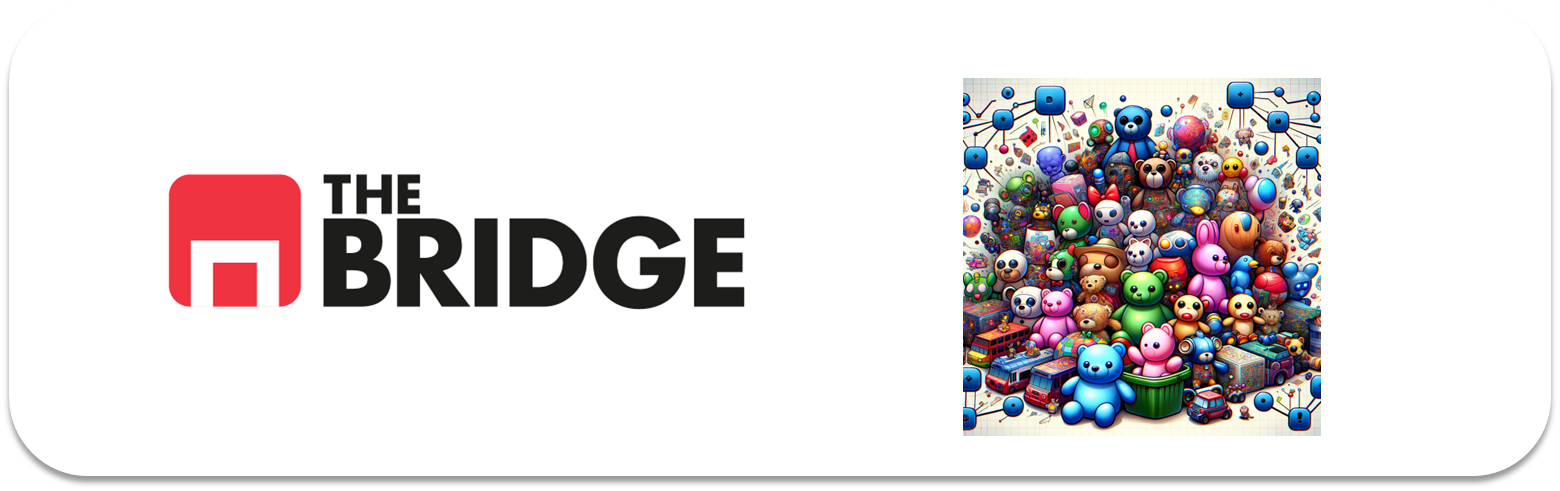

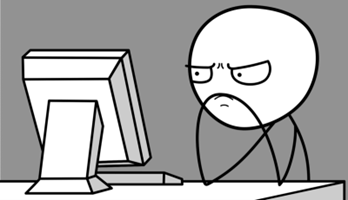

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [11]:
# gestionar datos
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_olivetti_faces

#pintar
import matplotlib.pyplot as plt 

# preparar datos
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# modelar
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier


# evaluar
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, classification_report

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [12]:
# Cargar el conjunto de datos
faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# Mostrar la descripción del conjunto de datos
print(faces["DESCR"])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [13]:
# Mostrar las primeras 10 etiquetas (identificadores de personas)
print("Targets (etiquetas de personas):", faces.target[:10])


Targets (etiquetas de personas): [20 28  3 21  9  8 32  9 26 12]


In [14]:
# Convertir las imágenes en un DataFrame (cada fila es una imagen aplanada en un vector)
df_faces = pd.DataFrame(faces.data)  # Cada fila corresponde con una imagen (4096 píxeles)
df_faces["target"] = faces.target    # Añadir el target al DataFrame

# Reordenar aleatoriamente las filas del DataFrame
df_faces_shuffled = df_faces.sample(frac=1, random_state=42).reset_index(drop=True)

# Mostrar las primeras filas del DataFrame original y el reordenado
print("DataFrame original (primeras filas):")
df_faces

DataFrame original (primeras filas):


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909,20
1,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744,28
2,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975,3
3,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859,21
4,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.194215,0.223140,0.314050,0.500000,0.636364,0.735537,0.797521,0.826446,0.847107,0.847107,...,0.206612,0.181818,0.165289,0.123967,0.123967,0.128099,0.136364,0.169421,0.165289,7
396,0.260331,0.355372,0.648760,0.822314,0.838843,0.834711,0.830579,0.826446,0.822314,0.814050,...,0.264463,0.185950,0.136364,0.177686,0.132231,0.103306,0.103306,0.107438,0.119835,10
397,0.611570,0.644628,0.657025,0.669421,0.673554,0.710744,0.735537,0.756198,0.760331,0.768595,...,0.152893,0.107438,0.119835,0.132231,0.111570,0.136364,0.177686,0.210744,0.223140,27
398,0.285124,0.293388,0.297521,0.293388,0.219008,0.107438,0.342975,0.508264,0.533058,0.557851,...,0.388430,0.442149,0.475207,0.500000,0.516529,0.520661,0.533058,0.533058,0.537190,34


In [15]:
print("\nDataFrame reordenado aleatoriamente (primeras filas):")
df_faces_shuffled


DataFrame reordenado aleatoriamente (primeras filas):


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.252066,0.231405,0.276859,0.417355,0.433884,0.669421,0.834711,0.859504,0.871901,0.871901,...,0.508264,0.268595,0.140496,0.165289,0.169421,0.173554,0.181818,0.173554,0.177686,18
1,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
2,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207,5
3,0.652893,0.690083,0.677686,0.690083,0.714876,0.743802,0.747934,0.735537,0.710744,0.681818,...,0.152893,0.140496,0.086777,0.111570,0.173554,0.243802,0.223140,0.260331,0.309917,22
4,0.409091,0.590909,0.657025,0.681818,0.694215,0.731405,0.760331,0.785124,0.776860,0.785124,...,0.276859,0.314050,0.268595,0.247934,0.256198,0.264463,0.252066,0.276859,0.285124,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.603306,0.586777,0.541322,0.603306,0.603306,0.607438,0.648760,0.640496,0.607438,0.599174,...,0.557851,0.553719,0.537190,0.541322,0.533058,0.504132,0.528926,0.495868,0.495868,14
396,0.566116,0.619835,0.657025,0.690083,0.702479,0.714876,0.702479,0.702479,0.723140,0.681818,...,0.483471,0.500000,0.483471,0.177686,0.322314,0.462810,0.293388,0.119835,0.115702,1
397,0.685950,0.698347,0.702479,0.706612,0.706612,0.714876,0.727273,0.743802,0.760331,0.780992,...,0.528926,0.438017,0.512397,0.694215,0.537190,0.318182,0.318182,0.342975,0.330579,5
398,0.793388,0.789256,0.780992,0.785124,0.789256,0.785124,0.785124,0.785124,0.785124,0.789256,...,0.289256,0.119835,0.132231,0.276859,0.367769,0.371901,0.322314,0.314050,0.359504,24


In [16]:
df_faces.target.unique()

array([20, 28,  3, 21,  9,  8, 32, 26, 12,  0, 36,  5,  7, 13,  4, 27, 37,
       23, 38,  1, 39, 11, 22, 10, 19, 34, 15, 14,  2, 18, 17, 33, 29, 25,
       35, 24,  6, 30, 31, 16])

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [17]:
# Dividir en entrenamiento (80%) y temp (test+val) (20%) manteniendo la estratificación
X_train, X_temp, y_train, y_temp = train_test_split(
    df_faces.drop(columns=["target"]), df_faces["target"], 
    test_size=0.2, stratify=df_faces["target"], random_state=42
)

# Dividir temp en validación (10%) y prueba (10%) con estratificación
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Mostrar el tamaño de cada conjunto
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} imágenes")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]} imágenes")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} imágenes")

Tamaño del conjunto de entrenamiento: 320 imágenes
Tamaño del conjunto de validación: 40 imágenes
Tamaño del conjunto de prueba: 40 imágenes


In [18]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
383,0.632231,0.652893,0.582645,0.636364,0.636364,0.706612,0.747934,0.780992,0.793388,0.814050,...,0.256198,0.285124,0.272727,0.210744,0.231405,0.223140,0.107438,0.082645,0.090909,0.090909
362,0.719008,0.727273,0.723140,0.714876,0.723140,0.731405,0.739669,0.760331,0.780992,0.793388,...,0.516529,0.500000,0.438017,0.566116,0.743802,0.566116,0.314050,0.301653,0.338843,0.322314
140,0.185950,0.342975,0.512397,0.570248,0.628099,0.615702,0.652893,0.661157,0.685950,0.727273,...,0.404959,0.351240,0.326446,0.355372,0.429752,0.487603,0.371901,0.301653,0.322314,0.318182
234,0.371901,0.487603,0.566116,0.586777,0.590909,0.615702,0.657025,0.665289,0.673554,0.685950,...,0.309917,0.280992,0.297521,0.351240,0.396694,0.421488,0.438017,0.371901,0.619835,0.590909
399,0.326446,0.144628,0.260331,0.752066,0.847107,0.851240,0.847107,0.847107,0.851240,0.842975,...,0.384298,0.376033,0.334711,0.243802,0.210744,0.157025,0.181818,0.140496,0.301653,0.157025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.669421,0.677686,0.673554,0.673554,0.657025,0.636364,0.648760,0.644628,0.648760,0.685950,...,0.462810,0.359504,0.219008,0.210744,0.219008,0.210744,0.223140,0.223140,0.219008,0.223140
376,0.706612,0.702479,0.735537,0.780992,0.789256,0.772727,0.789256,0.789256,0.789256,0.776860,...,0.202479,0.140496,0.152893,0.161157,0.148760,0.181818,0.210744,0.152893,0.177686,0.107438
315,0.181818,0.338843,0.355372,0.404959,0.438017,0.458678,0.471074,0.479339,0.491736,0.479339,...,0.152893,0.285124,0.392562,0.256198,0.396694,0.433884,0.392562,0.392562,0.454545,0.454545
393,0.578512,0.603306,0.632231,0.665289,0.677686,0.710744,0.723140,0.739669,0.739669,0.743802,...,0.157025,0.177686,0.194215,0.198347,0.206612,0.194215,0.165289,0.177686,0.161157,0.152893


### #1.4

Crea los pares X,y para train, validation y test.

In [19]:
# En el anterior paso

Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

Train dataset:


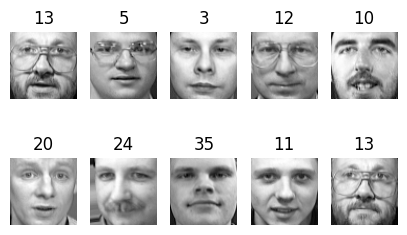

Validation dataset:


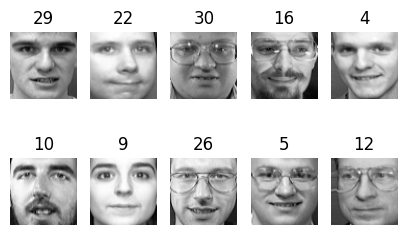

Test dataset:


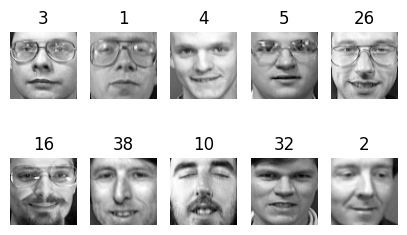

In [20]:
# Función para visualizar caras
def plot_faces(faces, labels, n_cols=5):
    faces = np.array(faces)  # Convertir a numpy array
    faces = faces.reshape(-1, 64, 64)  # Redimensionar a 64x64
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.5))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="grey")
        plt.axis("off")
        plt.title(label)
    plt.show()

# Visualizar algunas imágenes del conjunto de entrenamiento
print("Train dataset:")
plot_faces(X_train.iloc[:10].values, y_train.iloc[:10].values) #mostrar primeras 10 imágenes de entrenamiento (10 filas)

print("Validation dataset:")
# Visualizar algunas imágenes del conjunto de validación
plot_faces(X_val.iloc[:10].values, y_val.iloc[:10].values)

print("Test dataset:")
# Visualizar algunas imágenes del conjunto de prueba
plot_faces(X_test.iloc[:10].values, y_test.iloc[:10].values)


### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [21]:
pca = PCA(0.99) # indicamos el % de varianza que queremos mantener
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

pca.n_components_

221

In [22]:
pd.DataFrame(X_train_pca,columns=[f"feat_new_{i}" for i in range(1,pca.n_components_+1)])

,feat_new_1,feat_new_2,feat_new_3,feat_new_4,feat_new_5,feat_new_6,feat_new_7,feat_new_8,feat_new_9,feat_new_10,...,feat_new_212,feat_new_213,feat_new_214,feat_new_215,feat_new_216,feat_new_217,feat_new_218,feat_new_219,feat_new_220,feat_new_221
0,-0.526431,2.222157,1.068342,-1.799265,-0.718515,1.524708,-1.440415,-2.113195,-1.996780,0.587921,...,0.254087,0.115933,-0.190307,-0.003489,0.163560,0.357893,-0.104722,-0.189398,0.079525,-0.136147
1,-4.355068,2.870482,-0.259204,2.452004,3.452976,-1.514511,-1.363035,0.492717,0.245747,-0.741315,...,0.406226,-0.125004,-0.194345,-0.031096,-0.146726,0.105388,-0.090906,0.068442,0.034211,0.112858
2,-4.598103,-0.380970,-0.637667,-0.296068,-0.376390,0.982540,-0.795212,-0.804188,0.506547,-0.792179,...,-0.125866,0.094669,-0.142764,0.072473,-0.173203,0.131954,0.110551,-0.220713,0.056125,-0.053072
3,0.847233,-0.746168,-0.085560,-0.634090,0.677863,2.146518,-1.798240,-1.140543,-1.234190,0.076515,...,0.044729,0.123466,0.153589,-0.044762,-0.221051,-0.061766,0.151241,0.221550,0.046960,0.076480
4,-3.364859,3.805040,-2.646910,-2.462327,-1.136401,1.312305,0.373381,-1.876059,1.871684,-0.409600,...,0.134894,0.151106,0.115116,0.143995,-0.067752,0.032169,0.036778,0.007380,0.006936,-0.324686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,4.455242,1.958484,-2.402826,0.615188,-1.063919,0.293733,-1.641584,1.163143,2.407062,-2.074340,...,0.042579,-0.091023,0.102348,-0.006260,0.171373,0.062289,-0.062789,0.117034,-0.033110,-0.240364
316,-0.224612,2.349913,-0.540410,-3.880437,-0.088339,2.083117,-1.070116,1.195243,3.036204,0.982562,...,-0.165953,-0.079973,-0.151523,0.012299,0.110957,0.072075,-0.067864,0.049409,-0.112906,-0.028479
317,10.044882,-0.453789,-0.332880,0.322788,-0.293139,-1.408974,0.135374,1.448679,1.582129,-0.459675,...,-0.151864,-0.011806,-0.003033,0.113288,0.064959,-0.039879,0.007383,-0.002266,0.028699,-0.125916
318,2.732216,2.213704,2.782173,-0.212001,1.319137,0.554624,-0.233092,1.624755,1.813872,1.339299,...,0.055196,-0.132769,0.184984,0.059821,0.034251,-0.216160,0.152690,-0.173466,0.250347,-0.038317


In [23]:
X_train_pca

array([[-5.2643073e-01,  2.2221575e+00,  1.0683419e+00, ...,
        -1.8939850e-01,  7.9525381e-02, -1.3614698e-01],
       [-4.3550682e+00,  2.8704824e+00, -2.5920394e-01, ...,
         6.8441868e-02,  3.4210954e-02,  1.1285789e-01],
       [-4.5981030e+00, -3.8096991e-01, -6.3766682e-01, ...,
        -2.2071342e-01,  5.6125324e-02, -5.3072490e-02],
       ...,
       [ 1.0044882e+01, -4.5378938e-01, -3.3287951e-01, ...,
        -2.2659623e-03,  2.8699124e-02, -1.2591620e-01],
       [ 2.7322156e+00,  2.2137036e+00,  2.7821727e+00, ...,
        -1.7346647e-01,  2.5034708e-01, -3.8317166e-02],
       [-3.6499867e+00, -2.2006688e+00,  3.0097911e-01, ...,
        -1.9032309e-02,  1.7133284e-02,  6.2811822e-02]], dtype=float32)

### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

El mejor número de clusters según el score de silueta es K=120, con un score de 0.2088


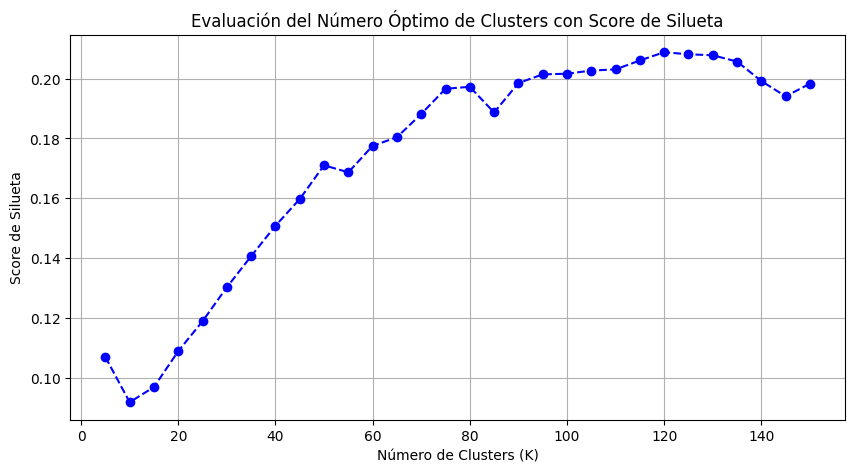

In [ ]:
# Rango de valores de K (de 5 en 5 hasta 150)
K_range = range(5, 151, 5)
silhouette_scores = []

# Evaluar K-Means con diferentes valores de K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_pca) # Asignación de etiquetas de los clusters definidos
    silhouette_scores.append(silhouette_score(X_train_pca, labels))

# Encontrar el mejor K según el máximo score de silueta
best_k = K_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print(f"El mejor número de clusters según el score de silueta es K={best_k}, con un score de {best_score:.4f}")

# Graficar la evolución del score de silueta con K
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Score de Silueta")
plt.title("Evaluación del Número Óptimo de Clusters con Score de Silueta")
plt.grid(True)
plt.show()


### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

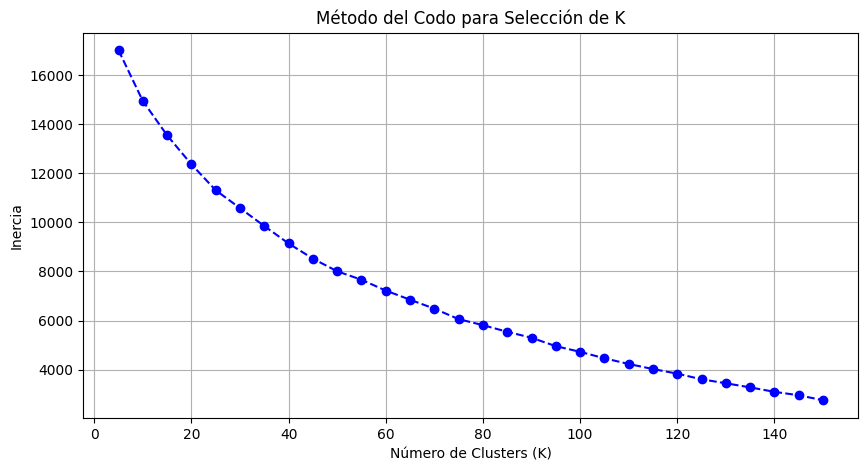

In [26]:
# Rango de valores de K (de 5 en 5 hasta 150)
K_range = range(5, 151, 5)
inertia = [] # lista para ir guardando las inercias

# Evaluar K-Means con diferentes valores de K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)
    inertia.append(kmeans.inertia_)

# Graficar la inercia en función de K
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del Codo para Selección de K")
plt.grid(True)
plt.show()

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [27]:
# Entrenar K-Means con el mejor K obtenido del score de silueta
best_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)
best_model.fit(X_train_pca)

print(f"Modelo K-Means entrenado con K={best_k} almacenado en 'best_model'.")

Modelo K-Means entrenado con K=120 almacenado en 'best_model'.


### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

🔹 Cluster 0 (3 imágenes)


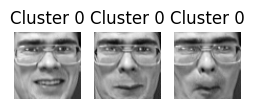

🔹 Cluster 1 (4 imágenes)


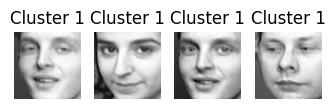

🔹 Cluster 2 (6 imágenes)


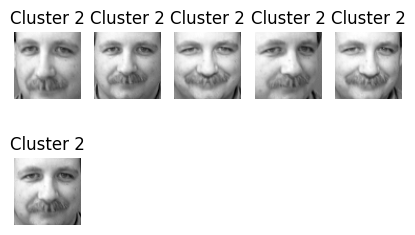

🔹 Cluster 3 (5 imágenes)


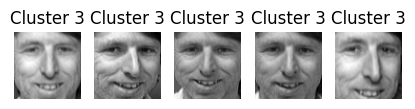

🔹 Cluster 4 (2 imágenes)


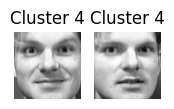

🔹 Cluster 5 (3 imágenes)


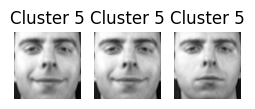

🔹 Cluster 6 (4 imágenes)


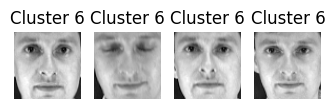

🔹 Cluster 7 (7 imágenes)


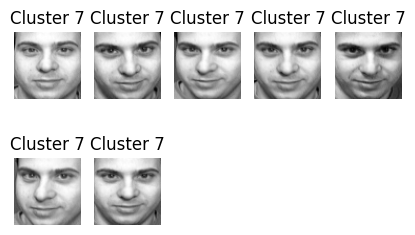

🔹 Cluster 8 (4 imágenes)


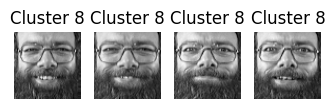

🔹 Cluster 9 (4 imágenes)


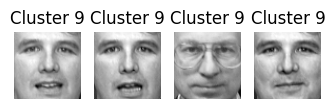

In [30]:
# Obtener las etiquetas asignadas por el modelo K-Means a los datos de entrenamiento
cluster_labels = best_model.labels_  # Etiquetas de los clusters

# Número de clusters a visualizar
num_clusters = min(10, best_k)  # Solo mostramos hasta 10 clusters

# Iterar sobre los primeros 10 clústers
for cluster_id in range (num_clusters):
    # seleccionar las imágenes pertenecientes al cluster actual
    cluster_indices = np.where(cluster_labels == cluster_id)[0]

    # obtener las imágenes originales (sin PCA) correspondientes a los índices seleccionados
    faces_original = X_train.iloc[cluster_indices] # Recuperamos imágenes originales

    # Si el cluster tiene imágenes, las mostramos
    if len(faces_original) > 0:
        print(f"🔹 Cluster {cluster_id} ({len(faces_original)} imágenes)")
        plot_faces(faces_original[:10].values, [f"Cluster {cluster_id}"] * len(faces_original[:10]))


## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [34]:
# Crear y entrenar el modelo Random Forest con 150 estimadores
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred = rf_model.predict(X_val)

# Evaluar el modelo con el dataset de validación
accuracy = accuracy_score(y_val, y_pred)
print(f"🔹 Accuracy en conjunto de validación: {accuracy:.4f}")

# Mostrar un reporte de clasificación detallado
print("\n🔹 Reporte de clasificación:")
print(classification_report(y_val, y_pred))

🔹 Accuracy en conjunto de validación: 0.9250

🔹 Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
       

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [35]:
# Transformar los datos: obtener distancias a los centroides de los clusters
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)

# Entrenar un clasificador en el conjunto reducido
rf_model_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

# Hacer predicciones en el conjunto de validación reducido
y_pred_reduced = rf_model_reduced.predict(X_valid_reduced)

# Evaluar el modelo
accuracy_reduced = accuracy_score(y_val, y_pred_reduced)
print(f"🔹 Accuracy en conjunto de validación (con reducción de K-Means): {accuracy_reduced:.4f}")

# Mostrar un reporte de clasificación detallado
print("\n🔹 Reporte de clasificación:")
print(classification_report(y_val, y_pred_reduced))

🔹 Accuracy en conjunto de validación (con reducción de K-Means): 0.8000

🔹 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00 

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

K=5, Accuracy=0.3750
K=10, Accuracy=0.5750
K=15, Accuracy=0.6750
K=20, Accuracy=0.6750
K=25, Accuracy=0.7000
K=30, Accuracy=0.7000
K=35, Accuracy=0.7750
K=40, Accuracy=0.8250
K=45, Accuracy=0.8000
K=50, Accuracy=0.8000
K=55, Accuracy=0.7500
K=60, Accuracy=0.7500
K=65, Accuracy=0.8000
K=70, Accuracy=0.7500
K=75, Accuracy=0.8000
K=80, Accuracy=0.7750
K=85, Accuracy=0.8000
K=90, Accuracy=0.8000
K=95, Accuracy=0.8000
K=100, Accuracy=0.7500
K=105, Accuracy=0.7500
K=110, Accuracy=0.7750
K=115, Accuracy=0.7750
K=120, Accuracy=0.8000
K=125, Accuracy=0.7750
K=130, Accuracy=0.7500
K=135, Accuracy=0.8000
K=140, Accuracy=0.7750
K=145, Accuracy=0.7750
K=150, Accuracy=0.7750

🔹 Mejor número de clusters K=40, con un Accuracy de 0.8250


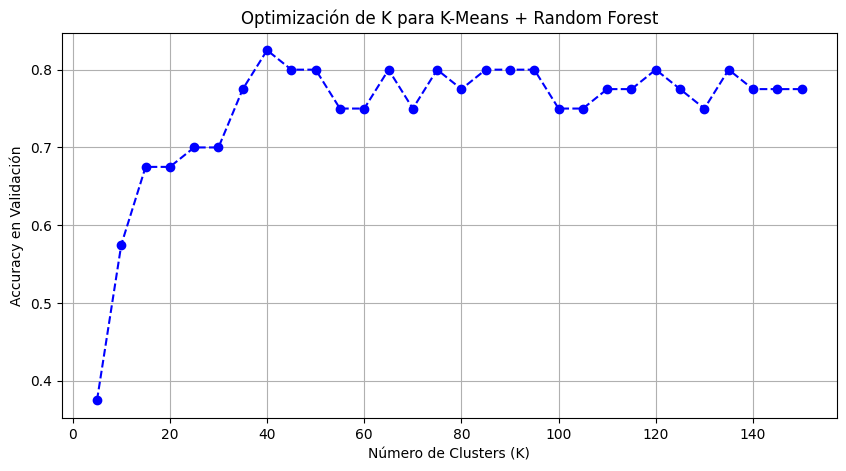

In [36]:
# Rango de valores de K a probar
K_values = range(5, 151, 5)  # Probamos de 5 en 5 hasta 150
accuracy_scores = []

# Buscar el mejor número de clusters K
for k in K_values:
    # Entrenar K-Means con K clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)

    # Transformar los datos a distancias a los centroides
    X_train_reduced = kmeans.transform(X_train_pca)
    X_valid_reduced = kmeans.transform(X_valid_pca)

    # Entrenar Random Forest en el conjunto reducido
    rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
    rf_model.fit(X_train_reduced, y_train)

    # Evaluar el modelo en validación
    y_pred = rf_model.predict(X_valid_reduced)
    accuracy = accuracy_score(y_val, y_pred)
    
    accuracy_scores.append(accuracy)
    print(f"K={k}, Accuracy={accuracy:.4f}")

# Encontrar el mejor K
best_k = K_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

print(f"\n🔹 Mejor número de clusters K={best_k}, con un Accuracy de {best_accuracy:.4f}")

# Graficar la evolución del accuracy con K
plt.figure(figsize=(10, 5))
plt.plot(K_values, accuracy_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Accuracy en Validación")
plt.title("Optimización de K para K-Means + Random Forest")
plt.grid(True)
plt.show()
